filtered min 0.0 max 4.8999977
Upper left corner [[0. 0.]
 [0. 0.]]
filtered min 0.0 max 1.0
outmax 0.8979591


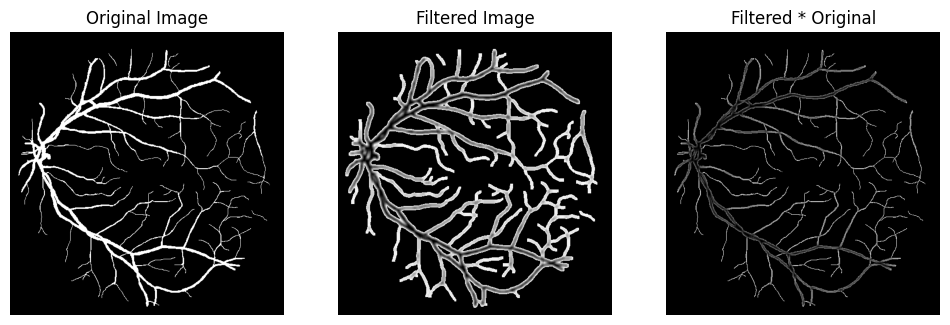

In [30]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from math import floor

mask_path = "/dhc/dsets/DRIVE/training/1st_manual/21_manual1.gif"
with Image.open(mask_path) as im:
    img = np.array(im.convert("L"))
img[img > 0] = 1
img = torch.from_numpy(img).float().unsqueeze(0)

# Define the convolutional kernel (3x3 kernel as an example)
kernel_weights = torch.tensor(
    [
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    ],
    dtype=torch.float32,
)  # Sobel filter for edge detection

# Reshape kernel to match PyTorch's expected dimensions (out_channels, in_channels, kernel_height, kernel_width)
kernel = kernel_weights.unsqueeze(0).unsqueeze(0)  # Shape (1, 1, 3, 3)

# Apply the convolution
output = F.conv2d(
    (img), kernel, stride=1, padding="same"
)  # Use padding=1 to keep the same size

# Visualize the original image and the result
original_image = img.squeeze().numpy()
filtered_image = output.squeeze().detach().numpy()
print("filtered min", filtered_image.min(), "max", filtered_image.max())
print("Upper left corner", filtered_image[0:2, 0:2])
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap="gray")
plt.axis("off")


filtered_image = (filtered_image - filtered_image.min()) / (
    filtered_image.max() - filtered_image.min()
)
print("filtered min", filtered_image.min(), "max", filtered_image.max())
plt.subplot(1, 3, 2)
plt.title("Filtered Image")

out = 1 - filtered_image
out[out > 0.9] = 0.0
print("outmax", out.max())
plt.imshow(out, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Filtered * Original")
plt.imshow(out*original_image, cmap="gray")
plt.axis("off")

plt.show()